In [5]:
import torch
import torch.nn as nn

def setAxisLabels(axis, xlabel, ylabel):
    axis.set_xlabel(xlabel)
    axis.set_ylabel(ylabel)
    
def createFigure(size, nRows, nCols):
    return plt.subplots(figsize = size, nrows = nRows, ncols = nCols)

In [7]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
pd.set_option('display.max_rows', 10)
# %matplotlib qt
%matplotlib inline

dados = pd.read_csv('dados.csv', names = ['x1', 'x2', 'x3', 'y']) 
X = torch.tensor(dados[['x1', 'x2', 'x3']].values, dtype = torch.float)
y = torch.tensor(dados[['y']].values, dtype = torch.float)
#X = (X - torch.mean(X, axis = 0))/(torch.std(X, axis = 0))

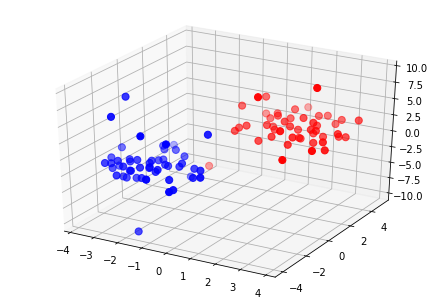

In [8]:
fig1 = plt.figure()
ax1 = Axes3D(fig1)

C1 = dados.where(dados["y"] > 0).dropna().index
C2 = dados.where(dados["y"] < 0).dropna().index

ax1.scatter(dados["x1"][C1], dados["x2"][C1], dados["x3"][C1], color = "r", s=50)
ax1.scatter(dados["x1"][C2], dados["x2"][C2], dados["x3"][C2], color = "b", s=50)

In [15]:
nNeurons = [3, 2, 1]
# Network = nn.Sequential(nn.Linear(nNeurons[0], nNeurons[1]),
#                         nn.Sigmoid(),
#                         nn.Linear(nNeurons[1], nNeurons[2]),
#                         nn.Sigmoid())
Network = nn.Sequential(nn.Linear(3, 1))
LossFunction = torch.nn.MSELoss()
optimizer = torch.optim.SGD(Network.parameters(), lr = 0.01)

for epoch in range(10**3):
    Predictions = Network(X)
    
    loss = LossFunction(Predictions, y)
    if(epoch%100 == 0):
        print("epoch: ", epoch, "; Loss: ", loss.item())
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch:  0 ; Loss:  2.1736466884613037
epoch:  100 ; Loss:  0.12370568513870239
epoch:  200 ; Loss:  0.11913968622684479
epoch:  300 ; Loss:  0.11905387789011002
epoch:  400 ; Loss:  0.11905217170715332
epoch:  500 ; Loss:  0.11905214190483093
epoch:  600 ; Loss:  0.11905214190483093
epoch:  700 ; Loss:  0.11905214190483093
epoch:  800 ; Loss:  0.11905214190483093
epoch:  900 ; Loss:  0.11905214190483093


In [72]:
Network.cuda?

Signature: Network.cuda(device=None)
Docstring:
Moves all model parameters and buffers to the GPU.

This also makes associated parameters and buffers different objects. So
it should be called before constructing optimizer if the module will
live on GPU while being optimized.

Arguments:
    device (int, optional): if specified, all parameters will be
        copied to that device

Returns:
    Module: self
File:      c:\users\patrick\anaconda3\lib\site-packages\torch\nn\modules\module.py
Type:      method
